### About the Project.

    About the Company
        Sports Authority of India was set up in 1984 to carry forward the legacy of the 9th Asian games held in New Delhi in 1982. It strives to achieve the twin objectives of promoting sports and achieving sports excellence at national and international levels. The organisation works relentlessly to identify young talent and provide necessary training to elite athletes!

    Expected output
        Through this menternship, you will create a report on the top attributes of top contenders for Orange cap in IPL.

#### IPL ORANGE CAP HOLDER

    Importing the necessary libraries and dataset

In [178]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [179]:
bat_df = pd.read_csv('deliveries.csv')
match_df = pd.read_csv('matches.csv')

In [180]:
bat_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [181]:
match_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [182]:
print(f"The Rows Train dataset contains : {bat_df.shape[0]}\nThe Columns dataset contains : {bat_df.shape[1]}")
print("-"*50)
print(f"The Rows Test dataset contains : {match_df.shape[0]}\nThe Columns dataset contains : {match_df.shape[1]}")

The Rows Train dataset contains : 260920
The Columns dataset contains : 17
--------------------------------------------------
The Rows Test dataset contains : 1095
The Columns dataset contains : 20


In [183]:
print(bat_df.columns)
print("-"*50)
print(match_df.columns)
print("-"*50)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')
--------------------------------------------------
Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')
--------------------------------------------------


In [184]:
bat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [185]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [186]:
bat_df.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [187]:
match_df.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [188]:
print(bat_df['match_id'].unique())
print(match_df['id'].unique())

[ 335982  335983  335984 ... 1426310 1426311 1426312]
[ 335982  335983  335984 ... 1426310 1426311 1426312]


In [189]:
print(len(bat_df['match_id'].unique()))
print(len(match_df['id'].unique()))

1095
1095


In [190]:
def generate_null_analysis(df):
    count = df.isnull().sum()
    percen = count / len(df) * 100
    
    df_null = pd.DataFrame({
        'column name': df.columns,
        'total count': count,
        'percentage': percen
    })
    
    df_null.reset_index(drop = True, inplace = True)
    df_null_sorted = df_null.sort_values(by = 'percentage', ascending = False)
    df_filtered = df_null_sorted[df_null_sorted['percentage'] > 0]
    df_filtered.reset_index(drop = True, inplace = True)
    
    return df_filtered

df_filtered_del = generate_null_analysis(bat_df)
df_filtered_match = generate_null_analysis(match_df)

def style_null_analysis(df):
    return df.style.background_gradient(cmap = 'YlOrRd', subset = ['percentage', 'total count'])

bat_df_styled = style_null_analysis(df_filtered_del)
match_df_styled = style_null_analysis(df_filtered_match)

In [191]:
from IPython.display import HTML, display  

display(HTML(  
    "<div style='display: flex; align-items: center; margin-left : 60px;'>" 
    f"<div style='flex: 1; padding: 10px;'>{bat_df_styled.to_html()}</div>"  
    f"<div style='flex: 1; padding: 10px;'>{match_df_styled.to_html()}</div>"  
    "</div>"  
))  

,column name,total count,percentage
0,fielder,251566,96.414993
1,dismissal_kind,247970,95.036793
2,player_dismissed,247970,95.036793
3,extras_type,246795,94.586463
,column name,total count,percentage
0,method,1074,98.082192
1,city,51,4.657534
2,result_margin,19,1.735160
3,winner,5,0.456621
4,player_of_match,5,0.456621


    There are two datasets deliveries and matches where both the file describes :- 
        1. Deliveries DataSet  - Tells about the each ball record of all batters and bowler as per matche.
        2. Matches - This table describes main file where the actual record of team winning lossing and the team detail is given.

    By the above normal information we got some of the checkout.
    - fielder, dismissal_kind, player_dismissed, extras_type from the deleveries dataset are 90% NUll so had to remove this and 
        method from the match dataset.
    - Here's Deleveries dataset has Rows : 260920, Columns : 17 and the Match dataset has Rows : 1095, Columns : 20

    Now let's work upon the actual EDA.

#### Exploratory Data Analysis on Match DataSet

In [192]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [193]:
match_df.shape[0]
print(f'Number of Rows : {match_df.shape[0]}\nNumber of Columns : {match_df.shape[1]}')

Number of Rows : 1095
Number of Columns : 20


In [194]:
match_df['method'].unique() # Is to be removed as its Useless.

array([nan, 'D/L'], dtype=object)

In [195]:
match_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah', 'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'],
      dtype=object)

In [196]:
print(match_df.loc[match_df['city'].isnull(), 'venue'].unique())
print('-'*40)
print(match_df.loc[match_df['city'].isnull(), 'venue'].value_counts())

['Sharjah Cricket Stadium' 'Dubai International Cricket Stadium']
----------------------------------------
venue
Dubai International Cricket Stadium    33
Sharjah Cricket Stadium                18
Name: count, dtype: int64


In [197]:
match_df.loc[match_df['city'].isnull() & ((match_df['venue'] == 'Dubai International Cricket Stadium') | match_df['venue'].isnull()), 'city'] = 'Dubai'  
match_df.loc[match_df['city'].isnull() & (match_df['venue'] == 'Sharjah Cricket Stadium'), 'city'] = 'Sharjah'  

In [198]:
match_df['city'].isnull().sum()

0

In [199]:
match_df['result'].unique()

array(['runs', 'wickets', 'tie', 'no result'], dtype=object)

In [200]:
match_df[match_df['result_margin'].isnull()]
# match_df[match_df['result'] == 'tie']
# match_df[match_df['result'] == 'no result']

# match_df[['city', 'result_margin']]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
66,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,151.0,20.0,Y,NaN,MR Benson,M Erasmus
130,419121,2009/10,Chennai,2010-03-21,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,137.0,20.0,Y,NaN,K Hariharan,DJ Harper
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
328,598004,2013,Hyderabad,2013-04-07,League,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,131.0,20.0,Y,NaN,AK Chaudhary,S Ravi
342,598017,2013,Bangalore,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,153.0,20.0,Y,NaN,M Erasmus,VA Kulkarni
416,729315,2014,Abu Dhabi,2014-04-29,League,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,153.0,20.0,Y,NaN,Aleem Dar,AK Chaudhary
475,829741,2015,Ahmedabad,2015-04-21,League,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,192.0,20.0,Y,NaN,M Erasmus,S Ravi
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
610,1082625,2017,Rajkot,2017-04-29,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,154.0,20.0,Y,NaN,AK Chaudhary,CB Gaffaney


In [201]:
match_df['result_margin'] = match_df['result_margin'].fillna(0.0)

In [202]:
match_df['result_margin'].isnull().sum()

0

In [203]:
match_df.drop(match_df[match_df['result'] == 'no result'].index, axis = 0, inplace = True)
match_df.drop(['method'], axis = 1, inplace = True)

In [204]:
match_df['season'].unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022',
       '2023', '2024'], dtype=object)

In [205]:
match_df['season'] = match_df['season'].replace({'2007/08' : '2008', '2009/10' : '2010', '2020/21' : '2020'})

In [206]:
match_df['season'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024'], dtype=object)

In [207]:
match_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur', 'Bengaluru',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [208]:
# match_df[match_df['city'] == 'Indore']

In [209]:
print(match_df['team1'].unique())
print('-'*50)
print(match_df['team2'].unique())
print('-'*50)
print(match_df['toss_winner'].unique())

['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals'
 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans'
 'Royal Challengers Bengaluru']
--------------------------------------------------
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Royal Challengers Bangalore' 'Deccan Chargers' 'Kings XI Punjab'
 'Delhi Daredevils' 'Mumbai Indians' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant' 'Delhi Capitals' 'Punjab Kings'
 'Gujarat Titans' 'Lucknow Super Giants' 'Royal Challengers Bengaluru']
--------------------------------------------------
['Royal Challengers Bangalore' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians'

In [210]:
team_dict = {  
    'Royal Challengers Bangalore': 'Royal Challengers Bangalore',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Kings XI Punjab': 'Punjab Kings',  
    'Delhi Daredevils': 'Delhi Capitals',  
    'Mumbai Indians': 'Mumbai Indians',  
    'Kolkata Knight Riders': 'Kolkata Knight Riders',  
    'Rajasthan Royals': 'Rajasthan Royals',  
    'Deccan Chargers': 'Sunrisers Hyderabad',  # Deccan Chargers evolved into Sunrisers Hyderabad  
    'Chennai Super Kings': 'Chennai Super Kings',  
    'Kochi Tuskers Kerala': 'Kochi Tuskers Kerala',  # This team no longer exists; you might choose to map to NaN or remove these rows  
    'Pune Warriors':  'Pune Warriors', # This team no longer exists; you might choose to map to NaN or remove these rows  
    'Sunrisers Hyderabad': 'Sunrisers Hyderabad',  
    'Gujarat Lions': 'Gujarat Titans',  # This team no longer exists; you might choose to map to NaN or remove these rows  
    'Rising Pune Supergiants': 'Pune Warriors',  # This team no longer exists; you might choose to map to NaN or remove these rows  
    'Rising Pune Supergiant': 'Pune Warriors',  # This team no longer exists; you might choose to map to NaN or remove these rows  
    'Delhi Capitals': 'Delhi Capitals',  
    'Punjab Kings': 'Punjab Kings',  
    'Lucknow Super Giants': 'Lucknow Super Giants',  
    'Gujarat Titans': 'Gujarat Titans'  
}

In [211]:
match_df['team1'] = match_df['team1'].replace(team_dict)
match_df['team2'] = match_df['team2'].replace(team_dict)
match_df['toss_winner'] = match_df['toss_winner'].replace(team_dict)
match_df['winner'] = match_df['winner'].replace(team_dict)

In [212]:
match_df['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

In [213]:
match_df['super_over'].unique()

array(['N', 'Y'], dtype=object)

In [214]:
match_df['super_over'].value_counts()

super_over
N    1076
Y      14
Name: count, dtype: int64

In [215]:
match_df.duplicated().sum()

0

In [216]:
match_df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'umpire1', 'umpire2'],
      dtype='object')

#### Exploratory Data Analysis on Deliveries DataSet

In [217]:
bat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [218]:
top_remover_column = bat_df.isnull().sum()[bat_df.isnull().sum() > 50].index.tolist()
top_remover_column 

['extras_type', 'player_dismissed', 'dismissal_kind', 'fielder']

In [219]:
bat_df.drop(top_remover_column , axis = 1, inplace = True)

In [220]:
print(bat_df['inning'].unique())
print('-'*50)
print(bat_df['inning'].value_counts())
print('-'*50)

[1 2 3 4 5 6]
--------------------------------------------------
inning
1    135018
2    125741
3        77
4        72
5         8
6         4
Name: count, dtype: int64
--------------------------------------------------


In [221]:
bat_df['batting_team'] = bat_df['batting_team'].replace(team_dict)
bat_df['bowling_team'] = bat_df['bowling_team'].replace(team_dict)

In [222]:
bat_df['over'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)

In [223]:
bat_df['ball'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [224]:
bat_df[['batsman_runs', 'extra_runs',
       'total_runs', 'is_wicket']].describe()

,batsman_runs,extra_runs,total_runs,is_wicket
count,260920.000000,260920.000000,260920.000000,260920.000000
mean,1.265001,0.067806,1.332807,0.049632
std,1.639298,0.343265,1.626416,0.217184
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000
max,6.000000,7.000000,7.000000,1.000000


In [225]:
bat_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'is_wicket'],
      dtype='object')

#### EDA and Visualization

In [226]:
match_df[['toss_winner', 'toss_decision']].head()

,toss_winner,toss_decision
0,Royal Challengers Bangalore,field
1,Chennai Super Kings,bat
2,Rajasthan Royals,bat
3,Mumbai Indians,bat
4,Sunrisers Hyderabad,bat


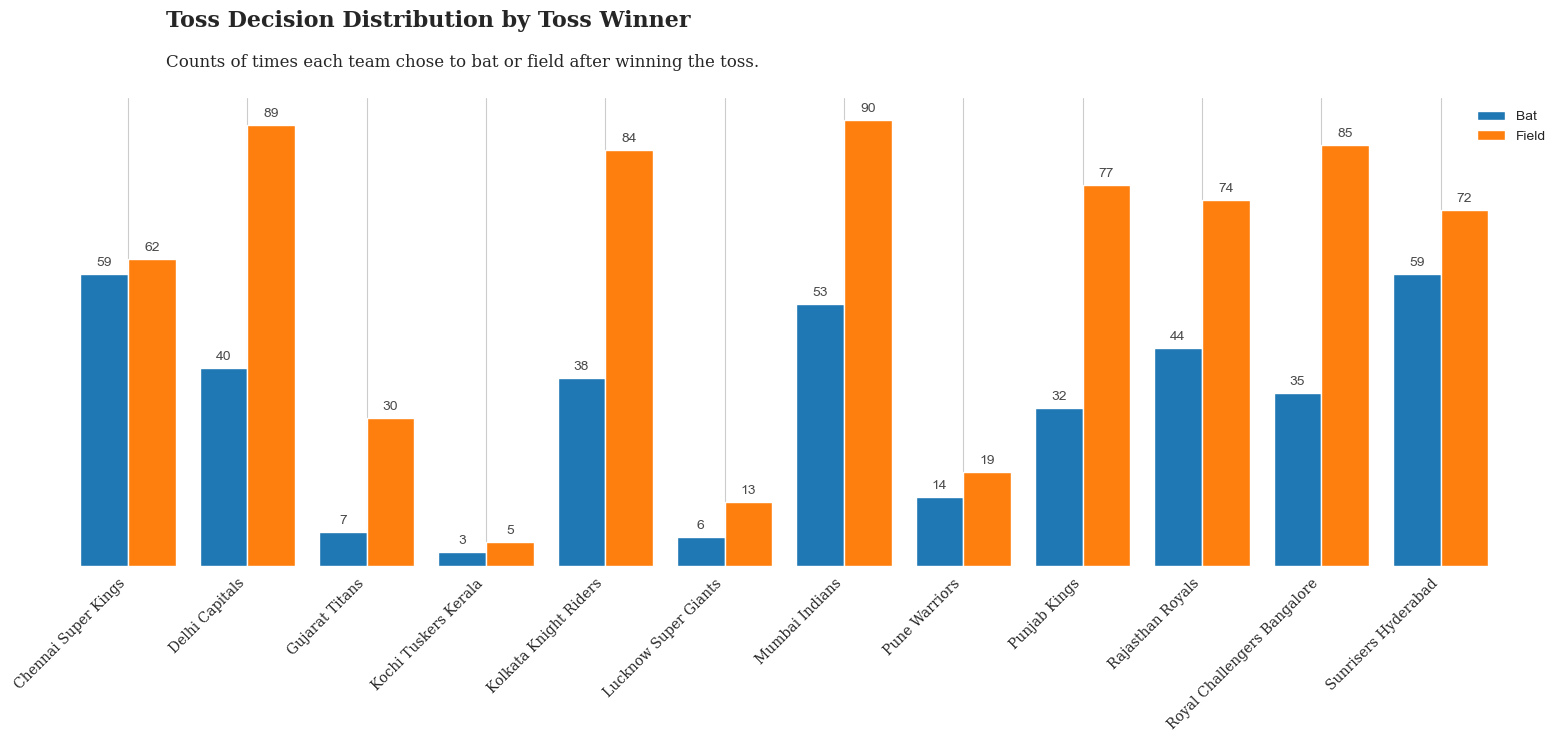

In [227]:
mf = match_df.groupby('toss_winner')['toss_decision'].value_counts().unstack().fillna(0).astype(int)  
mf = mf.sort_index()  

fig, ax = plt.subplots(figsize=(16, 8))  
width = 0.4  
x = range(len(mf.index))  

ax.bar([i - width/2 for i in x], mf['bat'], width=width, label='Bat', color='#1f77b4')  
ax.bar([i + width/2 for i in x], mf['field'], width=width, label='Field', color='#ff7f0e')  

for i, (bat, field) in enumerate(zip(mf['bat'], mf['field'])):  
    ax.annotate(f"{bat}", xy=(x[i] - width/2, bat + 1), va='bottom', ha='center', color='#4a4a4a')  
    ax.annotate(f"{field}", xy=(x[i] + width/2, field + 1), va='bottom', ha='center', color='#4a4a4a')  

ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)  
ax.set_xticks(x)  
ax.set_xticklabels(mf.index, rotation=45, ha='right', fontfamily='serif')  
ax.set_yticks([])  

plt.legend(loc='upper right', frameon=False)  

fig.text(0.12, 0.95, 'Toss Decision Distribution by Toss Winner', fontsize=16, fontweight='bold', fontfamily='serif')  
fig.text(0.12, 0.90, 'Counts of times each team chose to bat or field after winning the toss.', fontsize=12, fontfamily='serif')  

plt.tight_layout(rect=[0, 0.05, 1, 0.88])  
plt.show()  

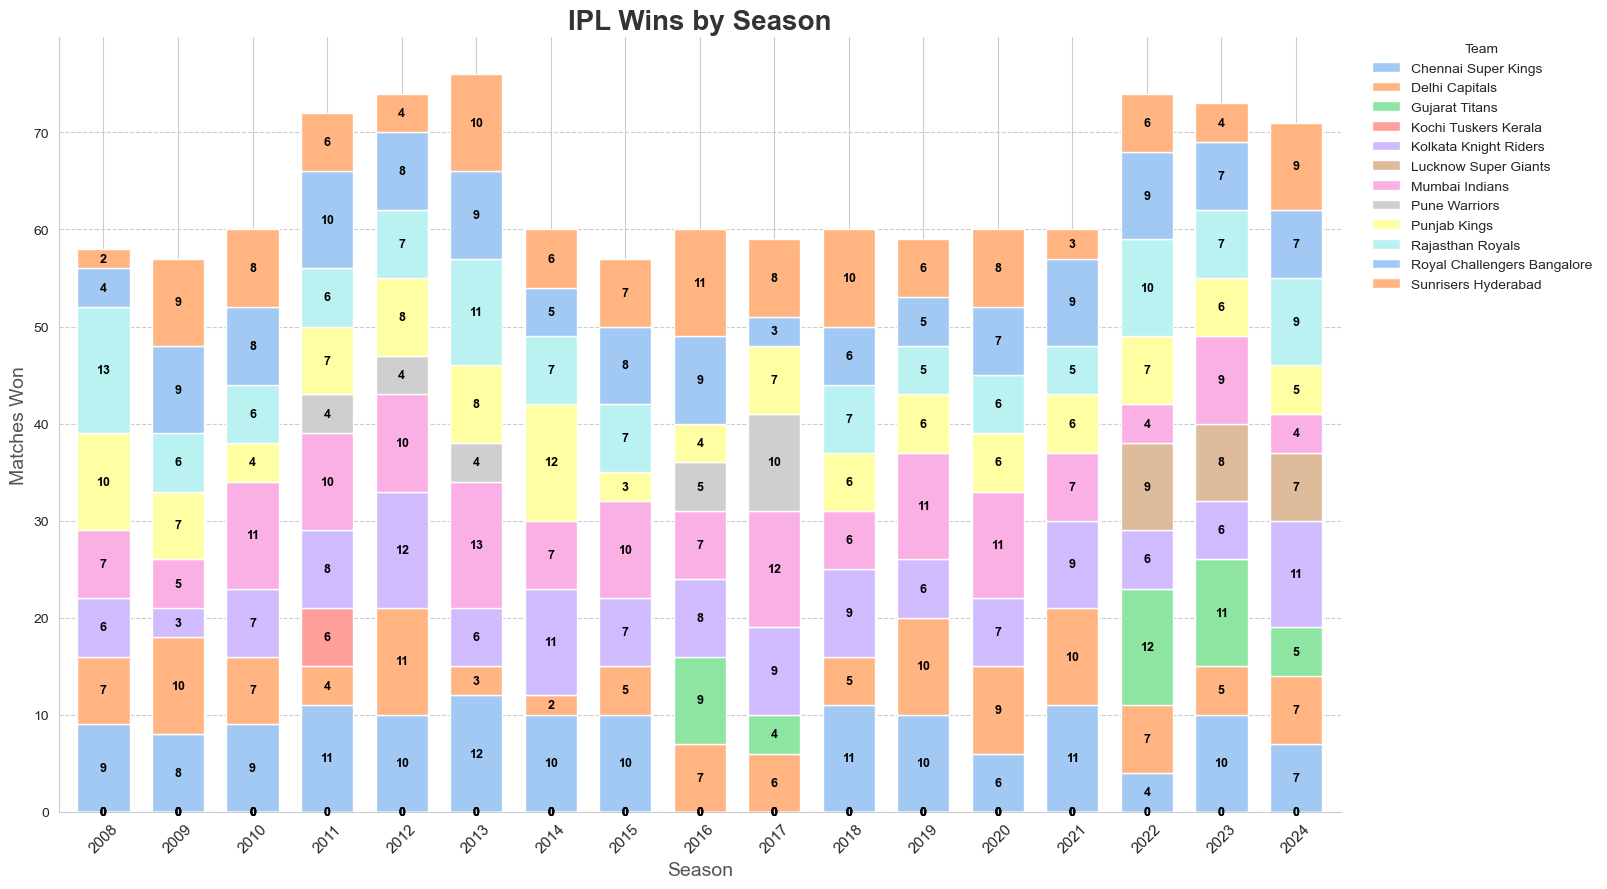

In [228]:
season_winners = match_df.groupby(['season', 'winner']).size().unstack(fill_value=0)  

sns.set_style("whitegrid")  
fig, ax = plt.subplots(figsize=(18, 9))  

colors = sns.color_palette("pastel", n_colors=len(season_winners.columns))  

season_winners.plot(kind='bar', stacked=True, color=colors, ax=ax, width=0.7)  

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=9, color='black', fontweight='bold')  

ax.set_title("IPL Wins by Season", fontsize=20, fontweight='bold', color="#333333")  
ax.set_xlabel("Season", fontsize=14, color="#555555")  
ax.set_ylabel("Matches Won", fontsize=14, color="#555555")
ax.tick_params(axis='x', rotation=45, labelsize=11)

ax.legend(title="Team", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, frameon=False, fontsize=10)  
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)  
ax.grid(axis='y', linestyle='--')  

plt.tight_layout(rect=[0, 0, 0.9, 1])  
plt.show()  

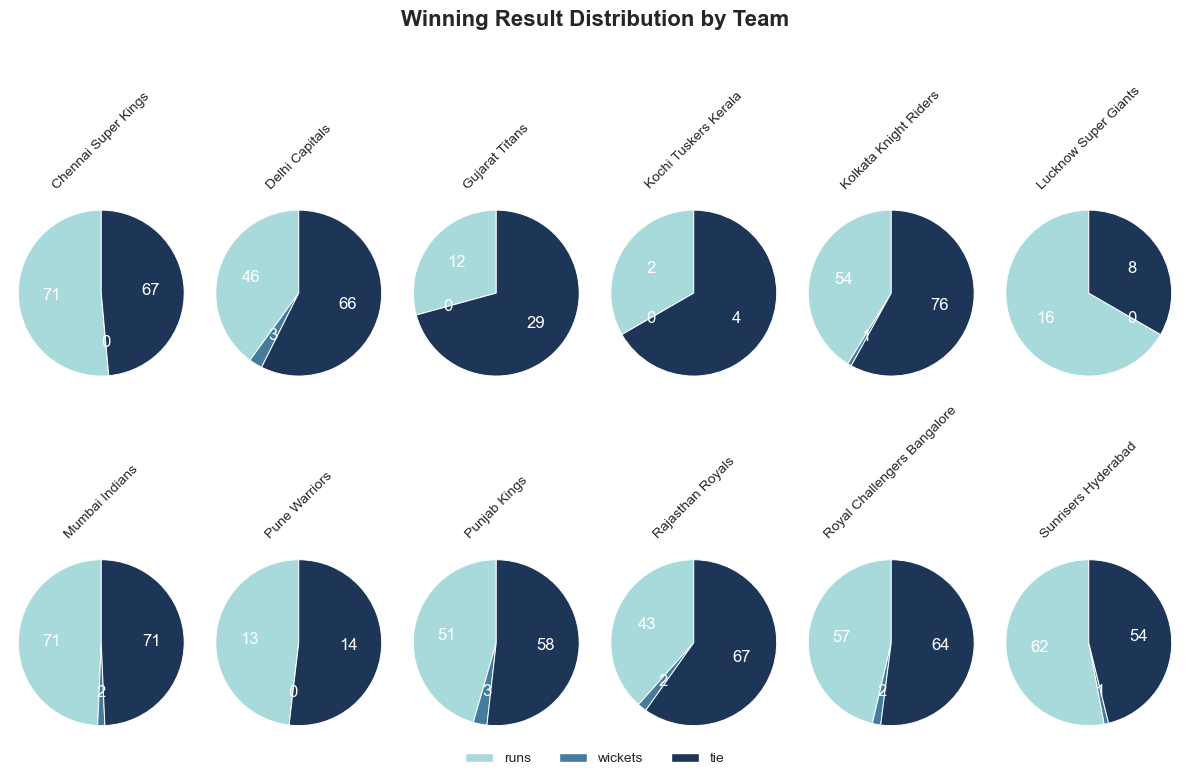

In [229]:
team_results = match_df.groupby(['winner', 'result']).size().unstack(fill_value=0)  
teams = sorted(match_df['winner'].unique())  
results = ['runs', 'wickets', 'tie']  
pie_colors = ['#a8dadc', '#457b9d', '#1d3557']  

fig, axes = plt.subplots(2, 6, figsize=(12, 8))  
axes = axes.flatten()  

for i, team in enumerate(teams):  
    ax = axes[i]  
    team_data = team_results.loc[team] if team in team_results.index else pd.Series([0] * len(results), index=results)  

    def autopct_format(values):  
        def my_autopct(pct):  
            total = sum(values)  
            val = int(round(pct*total/100.0))  
            return '{v:d}'.format(v=val)  
        return my_autopct  

    wedges, texts, autotexts = ax.pie(team_data, autopct=autopct_format(team_data), startangle=90, colors=pie_colors,  
                           wedgeprops={'linewidth': 0.7, 'edgecolor': 'white'},  
                           textprops={'fontsize': 12, 'color':'white'})  

    ax.set_title(team, fontsize=10, rotation=45)  
    ax.axis('equal')  

for i in range(len(teams), 12):  
    fig.delaxes(axes[i])  

fig.suptitle('Winning Result Distribution by Team', fontsize=16, fontweight='bold')  

handles = [plt.Rectangle((0, 0), 1, 1, color=color, ec="white") for color in pie_colors]  
labels = results  

fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=10, bbox_to_anchor=(0.5, 0.02), frameon=False)  

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  
plt.show()  

In [230]:
match_df[['winner', 'result']]

,winner,result
0,Kolkata Knight Riders,runs
1,Chennai Super Kings,runs
2,Delhi Capitals,wickets
3,Royal Challengers Bangalore,wickets
4,Kolkata Knight Riders,wickets
...,...,...
1090,Sunrisers Hyderabad,wickets
1091,Kolkata Knight Riders,wickets
1092,Rajasthan Royals,wickets
1093,Sunrisers Hyderabad,runs


In [231]:
match_df['target_overs'].unique()

array([20. , 16. ,  8. , 18. ,  6. ,  9.2, 17. , 10. , 13. , 12. ,  5. ,
       11. ,  9. , 14. , 15. ])

In [232]:
match_df[['date', 'target_runs']].head()

,date,target_runs
0,2008-04-18,223.0
1,2008-04-19,241.0
2,2008-04-19,130.0
3,2008-04-20,166.0
4,2008-04-20,111.0


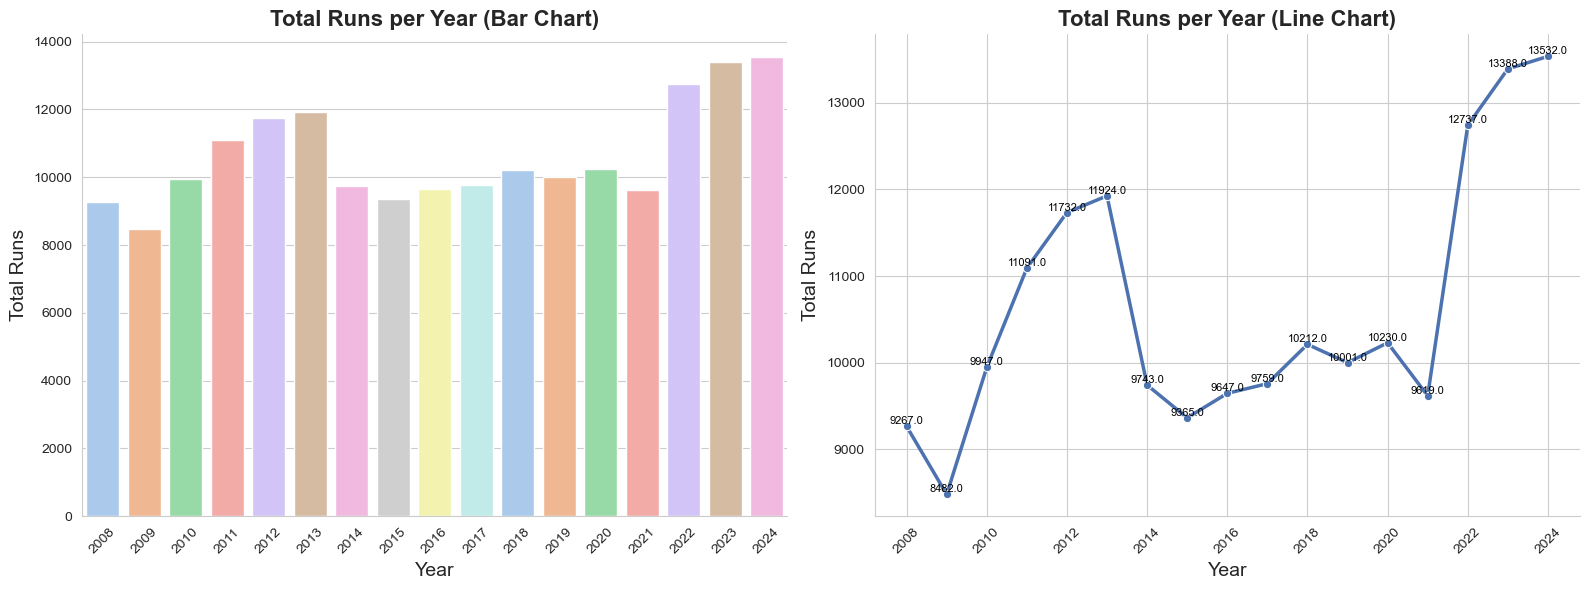

In [233]:
match_df['date'] = pd.to_datetime(match_df['date'])  
match_df['year'] = match_df['date'].dt.year  
runs_per_year = match_df.groupby('year')['target_runs'].sum()  

sns.set_style("whitegrid")  

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  

pastel_colors = sns.color_palette("pastel")  
sns.barplot(x=runs_per_year.index, y=runs_per_year.values, palette=pastel_colors, ax=axes[0])  
axes[0].set_xlabel("Year", fontsize=14)  
axes[0].set_ylabel("Total Runs", fontsize=14)  
axes[0].set_title("Total Runs per Year (Bar Chart)", fontsize=16, fontweight='bold')  
axes[0].tick_params(axis='x', rotation=45)  
sns.despine(ax=axes[0])  
axes[0].set_facecolor('white')  

for x, y in zip(runs_per_year.index, runs_per_year.values):  
    axes[1].text(x, y, f'{y}', ha='center', va='bottom', fontsize=8, color='black')  

sns.lineplot(x=runs_per_year.index, y=runs_per_year.values, marker='o', color="#4c72b0", linewidth=2.5, ax=axes[1])  
axes[1].set_xlabel("Year", fontsize=14)  
axes[1].set_ylabel("Total Runs", fontsize=14)  
axes[1].set_title("Total Runs per Year (Line Chart)", fontsize=16, fontweight='bold')  
axes[1].tick_params(axis='x', rotation=45)  
sns.despine(ax=axes[1])  
axes[1].set_facecolor('white')  

fig.patch.set_facecolor('white')  
plt.tight_layout()  
plt.show()  

In [234]:
bat_df[['batter', 'batsman_runs']].head()

,batter,batsman_runs
0,SC Ganguly,0
1,BB McCullum,0
2,BB McCullum,0
3,BB McCullum,0
4,BB McCullum,0


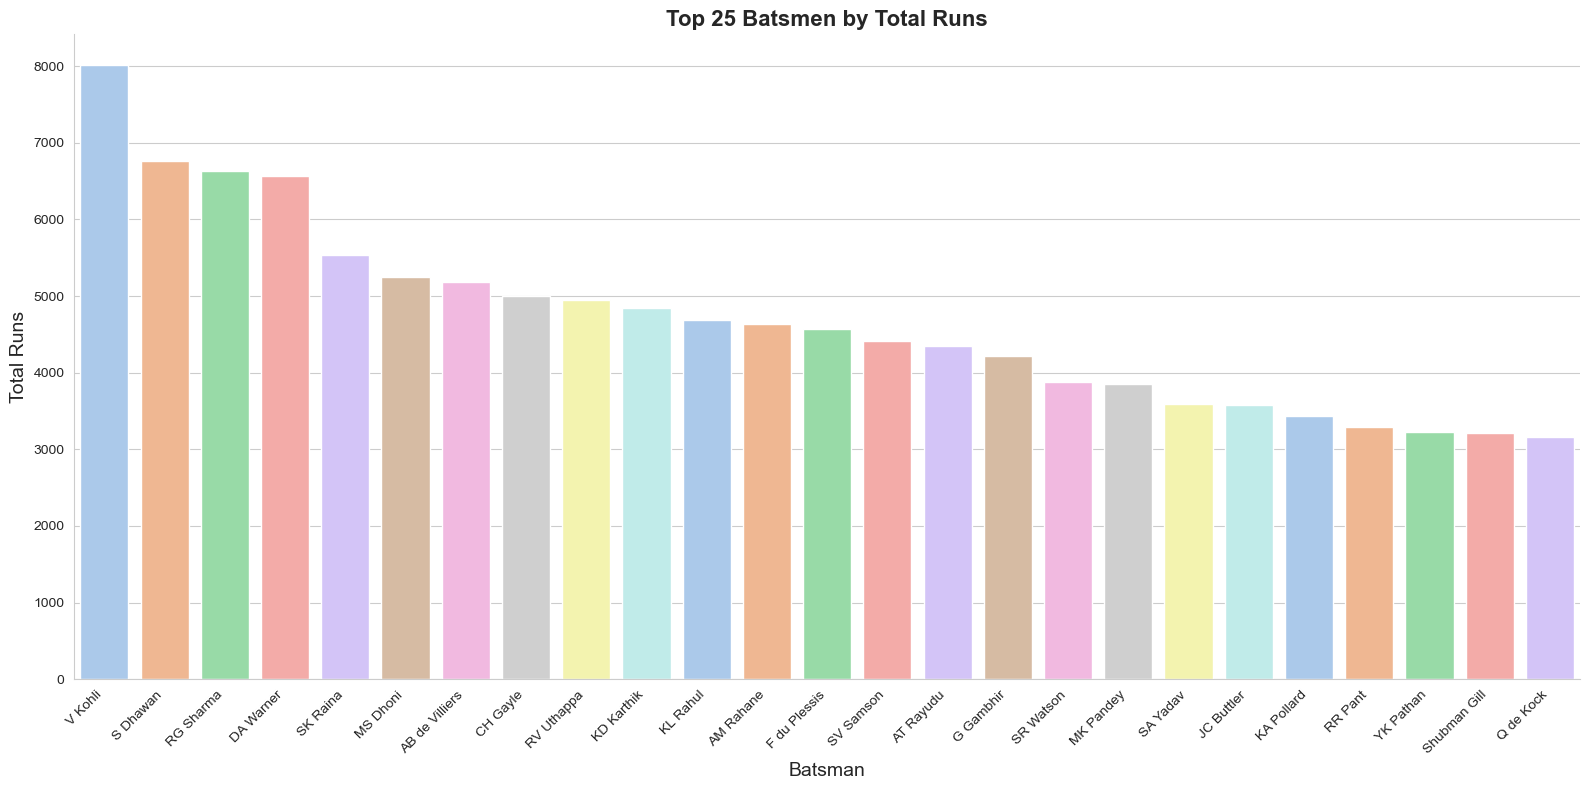

In [235]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

batsman_runs = bat_df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False)  
top_25_batsmen = batsman_runs.head(25)  

sns.set_style("whitegrid")  

plt.figure(figsize=(16, 8))  # Increased figure size for more bars  
sns.barplot(x=top_25_batsmen.index, y=top_25_batsmen.values, palette="pastel")  

plt.xlabel("Batsman", fontsize=14)  
plt.ylabel("Total Runs", fontsize=14)  
plt.title("Top 25 Batsmen by Total Runs", fontsize=16, fontweight='bold')  
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjusted fontsize for readability  

sns.despine()  
plt.gca().set_facecolor('white')  
plt.gcf().set_facecolor('white')  

plt.tight_layout()  
plt.show()  

In [236]:
bat_df[['bowler', 'is_wicket']].head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
bowler,P Kumar,P Kumar,P Kumar,P Kumar,P Kumar,P Kumar,P Kumar,Z Khan,Z Khan,Z Khan,Z Khan,Z Khan,Z Khan,P Kumar,P Kumar,P Kumar,P Kumar,P Kumar,P Kumar,AA Noffke
is_wicket,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


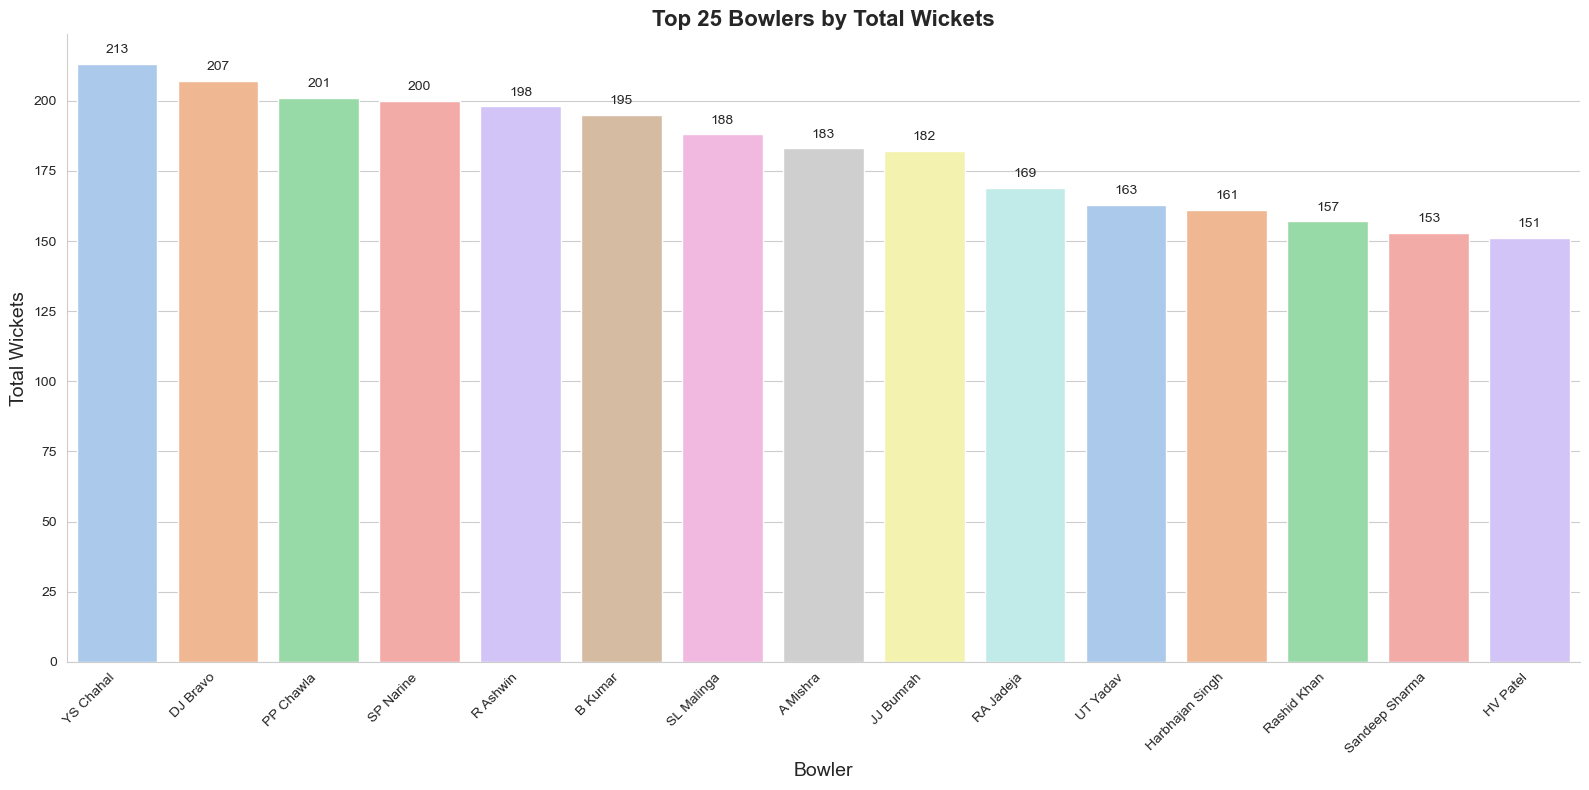

In [237]:
bowler_wickets = bat_df.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False)  
top_25_bowlers = bowler_wickets.head(15)  

sns.set_style("whitegrid")  

plt.figure(figsize=(16, 8))  
ax = sns.barplot(x=top_25_bowlers.index, y=top_25_bowlers.values, palette="pastel")  

for p in ax.patches:  
    ax.annotate(f'{int(p.get_height())}',   
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center',  
                xytext=(0, 10), textcoords='offset points')  

plt.xlabel("Bowler", fontsize=14)  
plt.ylabel("Total Wickets", fontsize=14)  
plt.title("Top 25 Bowlers by Total Wickets", fontsize=16, fontweight='bold')  
plt.xticks(rotation=45, ha='right', fontsize=10)  

sns.despine()  
plt.gca().set_facecolor('white')  
plt.gcf().set_facecolor('white')  

plt.tight_layout()  
plt.show()  

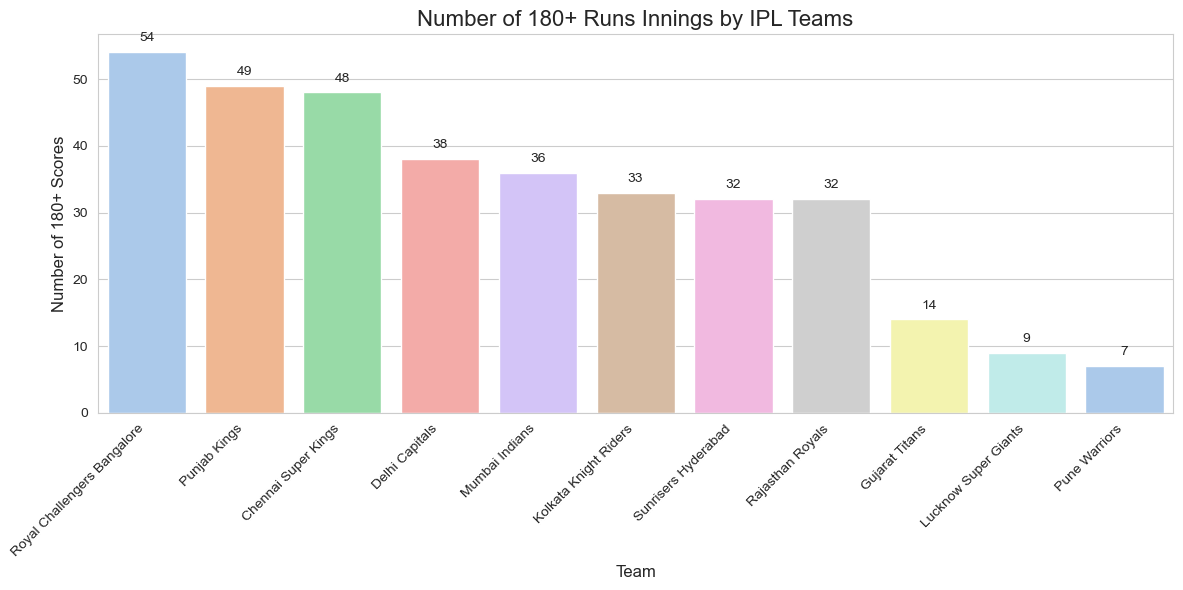

In [238]:
high_scores = match_df[match_df['target_runs'] >= 180]  

team_200plus_counts = high_scores['team1'].value_counts().reset_index()  
team_200plus_counts.columns = ['Team', '200+ Scores']  

plt.figure(figsize=(12, 6))  
ax = sns.barplot(x=team_200plus_counts['Team'], y=team_200plus_counts['200+ Scores'], palette='pastel')  

plt.xlabel("Team", fontsize=12)  
plt.ylabel("Number of 180+ Scores", fontsize=12)  
plt.title("Number of 180+ Runs Innings by IPL Teams", fontsize=16)  
plt.xticks(rotation=45, ha='right')  

for p in ax.patches:  
    ax.annotate(f'{int(p.get_height())}',   
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center',  
                xytext=(0, 10), textcoords='offset points')  

plt.tight_layout()  
plt.show()  

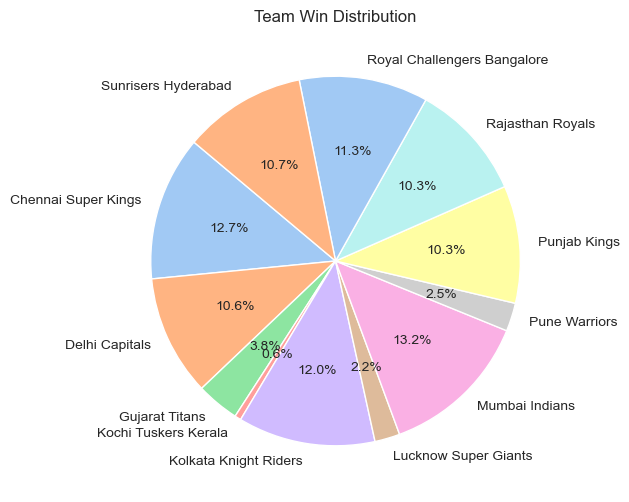

In [239]:
matches_played = pd.concat([match_df['team1'], match_df['team2']]).value_counts()  

matches_won = match_df['winner'].value_counts()  
  
team_performance = pd.DataFrame({'Matches Played': matches_played, 'Matches Won': matches_won})  
team_performance['Win Percentage'] = (team_performance['Matches Won'] / team_performance['Matches Played']) * 100  
team_performance = team_performance.fillna(0)  # Fill NaN values for teams that never won  
 
plt.figure(figsize=(10, 6))  
plt.pie(team_performance['Matches Won'], labels=team_performance.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))  
plt.title("Team Win Distribution")  
plt.show()  

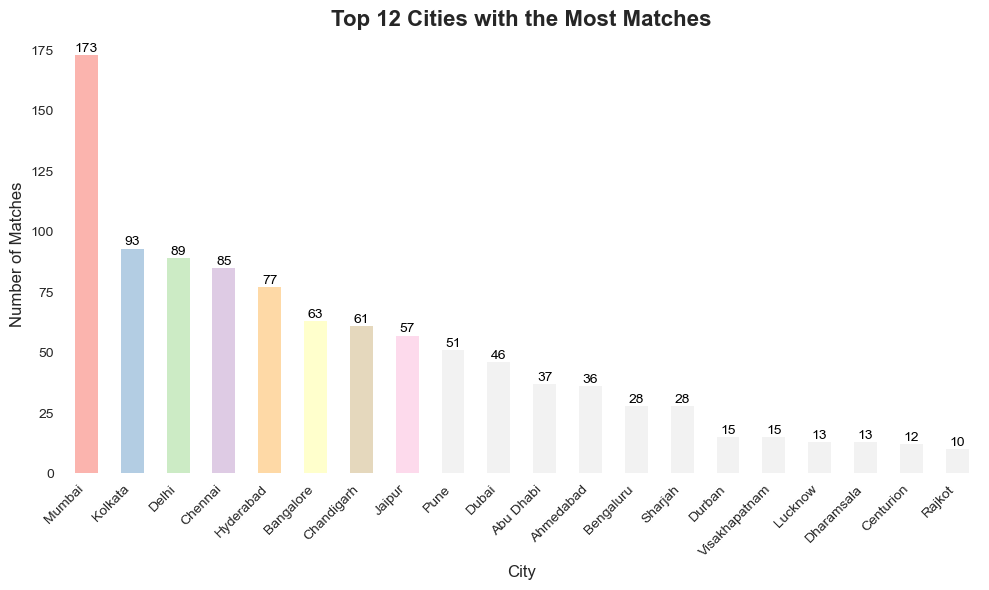

In [240]:
city_counts = match_df['city'].value_counts()
top_cities = city_counts.head(20)

pastel_colors = plt.cm.Pastel1(range(len(top_cities)))

plt.figure(figsize=(10, 6))
bars = top_cities.plot(kind='bar', color=pastel_colors, edgecolor='none')

for i, v in enumerate(top_cities):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Top 12 Cities with the Most Matches', fontsize=16, weight='bold')
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.grid(False)
plt.tight_layout()
plt.show()


In [241]:
match_df['match_type'].unique()

array(['League', 'Semi Final', 'Final', '3rd Place Play-Off',
       'Qualifier 1', 'Elimination Final', 'Qualifier 2', 'Eliminator'],
      dtype=object)

In [242]:
# 3rd Place Play-Off as Eliminator
# Semifinal 55, 112, 171 as Eliminator 1 and Semifinal 56, 113, 172 as Eliminator 2
# Elimination Final as Eliminator

match_df['match_type'] = match_df['match_type'].replace({'3rd Place Play-Off' : 'Eliminator', 'Elimination Final' : 'Eliminator'})
match_df.loc[match_df['id'].isin([336038, 392237, 419162]), 'match_type'] = 'Qualifier 1'
match_df.loc[match_df['id'].isin([336039, 392238, 419163]), 'match_type'] = 'Qualifier 2'

In [243]:
# match_df[match_df['match_type'] == 'Semi Final']
match_df['match_type'].unique()

array(['League', 'Qualifier 1', 'Qualifier 2', 'Final', 'Eliminator'],
      dtype=object)

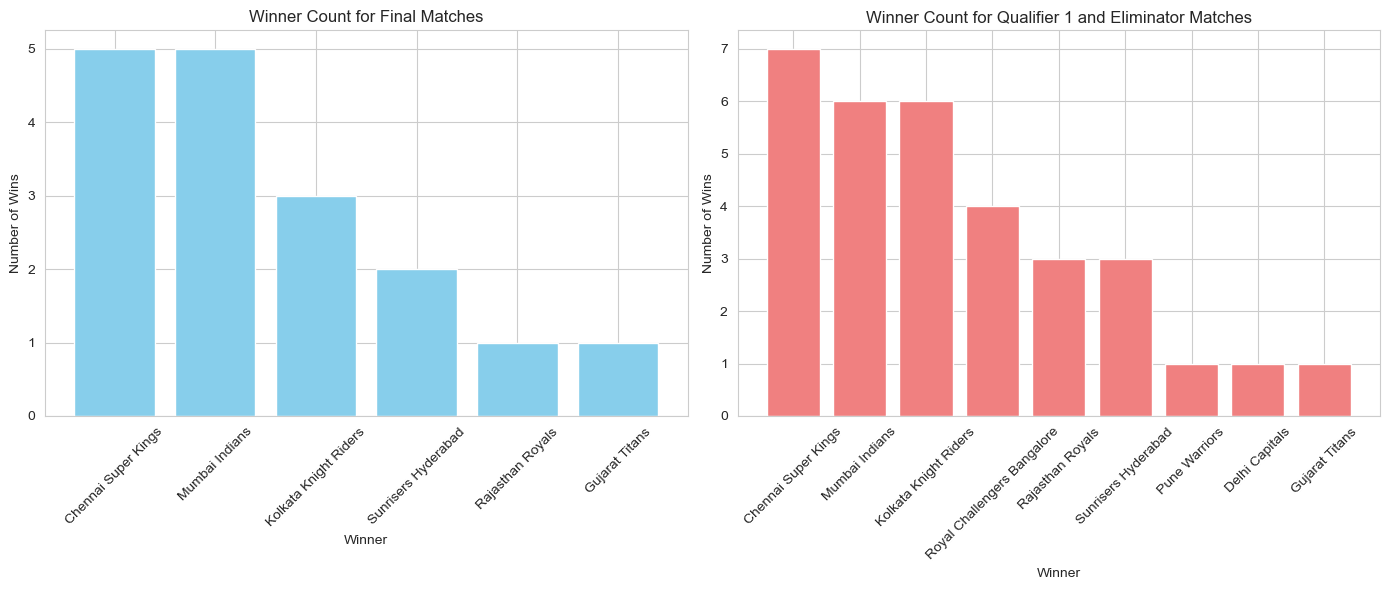

In [244]:
final_df = match_df[match_df['match_type'] == 'Final']
qualifier_eliminator_df = match_df[match_df['match_type'].isin(['Qualifier 1', 'Eliminator'])]

final_winner_count = final_df['winner'].value_counts()
qualifier_eliminator_winner_count = qualifier_eliminator_df['winner'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(final_winner_count.index, final_winner_count.values, color='skyblue')
axes[0].set_title('Winner Count for Final Matches')
axes[0].set_xlabel('Winner')
axes[0].set_ylabel('Number of Wins')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(qualifier_eliminator_winner_count.index, qualifier_eliminator_winner_count.values, color='lightcoral')
axes[1].set_title('Winner Count for Qualifier 1 and Eliminator Matches')
axes[1].set_xlabel('Winner')
axes[1].set_ylabel('Number of Wins')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

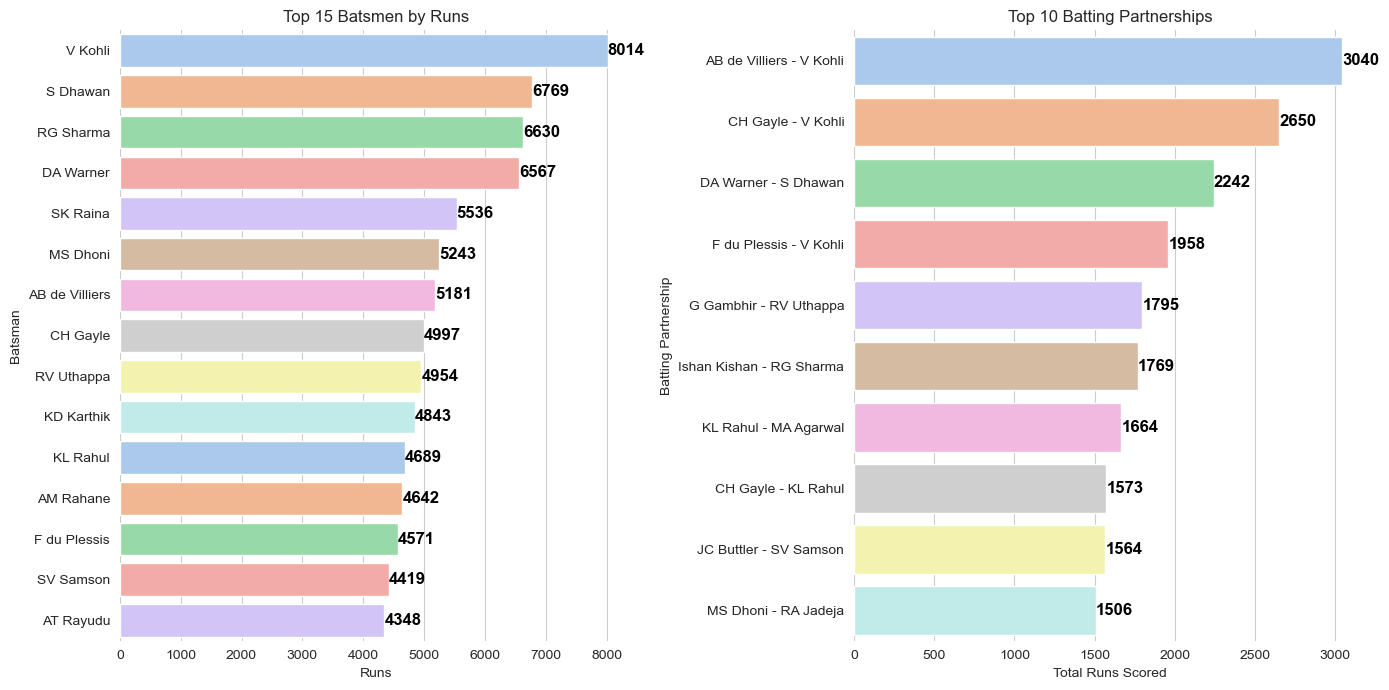

In [245]:
batsman_runs = bat_df.groupby('batter')['batsman_runs'].sum().reset_index()  
batsman_runs = batsman_runs.sort_values(by='batsman_runs', ascending=False).head(15)  

pastel_colors = sns.color_palette("pastel")  

plt.figure(figsize=(14, 7))  
plt.subplot(1, 2, 1)  
ax = sns.barplot(x='batsman_runs', y='batter', data=batsman_runs, palette=pastel_colors)  
plt.title('Top 15 Batsmen by Runs')  
plt.xlabel('Runs')  
plt.ylabel('Batsman')  
sns.despine(left=True, bottom=True)  

for index, value in enumerate(batsman_runs['batsman_runs']):  
    ax.text(value, index, str(value), va='center', fontsize=12, color='black', fontweight='bold', ha='left')  


bat_df['batting_pair'] = bat_df.apply(lambda x: ' - '.join(sorted([x['batter'], x['non_striker']])), axis=1)  
partnership_runs = bat_df.groupby('batting_pair')['batsman_runs'].sum().reset_index()  
partnership_runs = partnership_runs.sort_values(by='batsman_runs', ascending=False).head(10)  

plt.subplot(1, 2, 2)  
ax = sns.barplot(x='batsman_runs', y='batting_pair', data=partnership_runs, palette=pastel_colors)  

for index, value in enumerate(partnership_runs['batsman_runs']):  
    ax.text(value + 2, index, str(value), va='center', fontsize=12, color='black', fontweight='bold')  

plt.xlabel("Total Runs Scored")  
plt.ylabel("Batting Partnership")  
plt.title("Top 10 Batting Partnerships")  
sns.despine(left=True, bottom=True)  

plt.tight_layout()  
plt.show()  

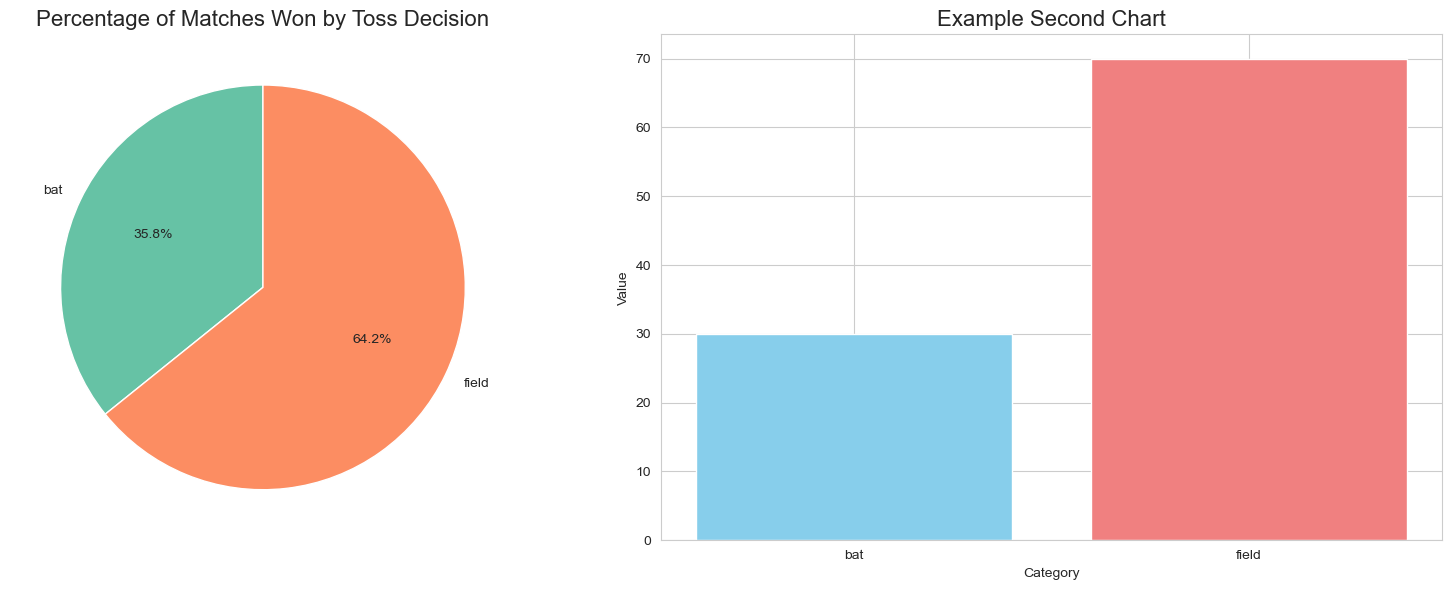

In [246]:
import matplotlib.pyplot as plt  
import pandas as pd  

df_clean = match_df.dropna(subset=['winner'])  
wins_by_decision = df_clean.groupby('toss_decision').size().reset_index(name='wins')  
total_matches = df_clean.shape[0]  
wins_by_decision['percentage'] = (wins_by_decision['wins'] / total_matches) * 100  

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].pie(wins_by_decision['percentage'], labels=wins_by_decision['toss_decision'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Set2.colors)  
axes[0].set_title('Percentage of Matches Won by Toss Decision', fontsize=16)  

example_data = pd.DataFrame({'Category': ['bat', 'field'], 'Value': [30, 70]})  
axes[1].bar(example_data['Category'], example_data['Value'], color=['skyblue', 'lightcoral'])
axes[1].set_title('Example Second Chart', fontsize=16)  
axes[1].set_xlabel('Category')  
axes[1].set_ylabel('Value')  

plt.tight_layout()  
plt.show()  

In [261]:
def style_dataframe(df):  
    """Applies styling to a Pandas DataFrame."""  
    styled_df = df.style.background_gradient(cmap='viridis')  
    return styled_df  

def is_six(batsman_runs):  
    return 1 if batsman_runs == 6 else 0  

def is_four(batsman_runs):  
    return 1 if batsman_runs == 4 else 0  

df = bat_df[bat_df.inning.isin([1, 2])].copy()  

# Most Sixes  
df['is_six'] = df['batsman_runs'].apply(is_six)  
most_sixs = df.groupby("batter")['is_six'].sum().sort_values(ascending=False).head(10).reset_index()  
most_sixs = most_sixs.rename(columns={'batter': 'Batter', 'is_six': "Sixes"})  
styled_sixs = style_dataframe(most_sixs)

# Most Fours  
df['is_four'] = df['batsman_runs'].apply(is_four)  
most_fours = df.groupby("batter")['is_four'].sum().sort_values(ascending=False).head(10).reset_index()  
most_fours = most_fours.rename(columns={'batter': 'Batter', 'is_four': "Fours"})  
styled_fours = style_dataframe(most_fours)

html = f"""  
<div style='display: flex; align-items: center; margin-left : 60px;'>
    <div style='flex: 1; padding: 10px;'>  
        <h2>Most Sixes</h2>  
        {styled_sixs.to_html()}  
    </div>  
    <div style='flex: 1; padding: 10px;'>  
        <h2>Most Fours</h2>  
        {styled_fours.to_html()}  
    </div>  
</div>  
"""  
display(HTML(html))  

print(100*'-')

batter_stats = bat_df.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('batsman_runs', 'count')
).reset_index()

batter_stats['strike_rate'] = (batter_stats['total_runs'] / batter_stats['balls_faced']) * 100

batter_stats_sorted = batter_stats.sort_values(by='strike_rate', ascending=False)

strike_df = batter_stats_sorted[['batter', 'total_runs', 'balls_faced', 'strike_rate']]
strike_df = strike_df.sort_values('total_runs', ascending = False)
strike_df = style_dataframe(strike_df.head(10))
strike_df

,Batter,Sixes
0,CH Gayle,357
1,RG Sharma,281
2,V Kohli,273
3,MS Dhoni,252
4,AB de Villiers,251
5,DA Warner,236
6,KA Pollard,223
7,AD Russell,209
8,SV Samson,206
9,SK Raina,203


----------------------------------------------------------------------------------------------------


,batter,total_runs,balls_faced,strike_rate
631,V Kohli,8014,6236,128.511867
512,S Dhawan,6769,5483,123.454313
477,RG Sharma,6630,5183,127.918194
147,DA Warner,6567,4849,135.429986
546,SK Raina,5536,4177,132.535312
374,MS Dhoni,5243,3947,132.835065
30,AB de Villiers,5181,3487,148.580442
124,CH Gayle,4997,3516,142.121729
501,RV Uthappa,4954,3927,126.152279
282,KD Karthik,4843,3687,131.353404


In [264]:
bat_df['batsman_runs'].unique()

array([0, 4, 6, 1, 2, 5, 3], dtype=int64)

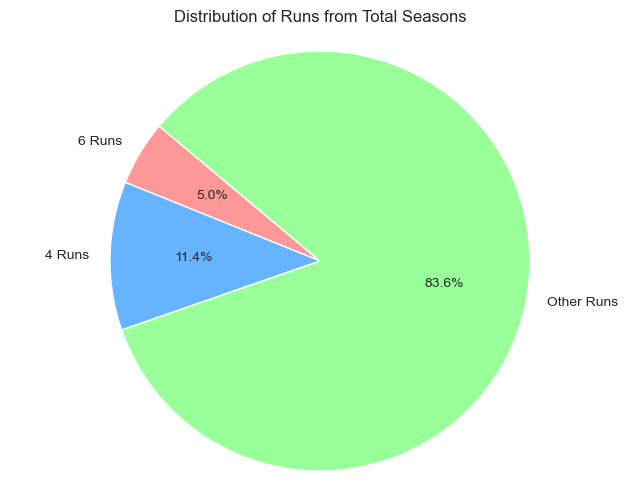

In [266]:
counts = {  
    '6 Runs': (bat_df['batsman_runs'] == 6).sum(),  
    '4 Runs': (bat_df['batsman_runs'] == 4).sum(),  
    'Other Runs': (bat_df['batsman_runs'] != 6) & (bat_df['batsman_runs'] != 4)  
}  

counts['Other Runs'] = (bat_df['batsman_runs'][counts['Other Runs']]).count()  

labels = counts.keys()  
sizes = counts.values()

plt.figure(figsize=(8, 6))  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140 , colors=['#ff9999','#66b3ff','#99ff99'])  
plt.title('Distribution of Runs from Total Seasons')  
plt.axis('equal')
plt.show()

In [268]:
match_df[['team1', 'team2', 'winner']]

,team1,team2,winner
0,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
1,Punjab Kings,Chennai Super Kings,Chennai Super Kings
2,Delhi Capitals,Rajasthan Royals,Delhi Capitals
3,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore
4,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders
...,...,...,...
1090,Punjab Kings,Sunrisers Hyderabad,Sunrisers Hyderabad
1091,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders
1092,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals
1093,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad


In [278]:
wins = match_df.groupby(['team1', 'winner']).size().unstack(fill_value=0)
total_matches = match_df.groupby(['team1', 'team2']).size().unstack(fill_value=0)
winning_percentage = (wins.div(total_matches, fill_value=0)) * 100
winning_percentage = winning_percentage.fillna(0)
def color_shade(val):
    if val > 0:
        blue_intensity = 1 - (val / 100)
        color = f'rgba(0, 0, 255, {blue_intensity})'
    else:
        color = 'rgba(255, 255, 255, 1)'
    return f'background-color: {color}'

styled_winning_percentage = winning_percentage.style.applymap(color_shade)
styled_winning_percentage

winner,Chennai Super Kings,Delhi Capitals,Gujarat Titans,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Punjab Kings,Rajasthan Royals,Royal Challengers Bangalore,Sunrisers Hyderabad
team1,,,,,,,,,,,,
Chennai Super Kings,inf,35.294118,60.000000,0.000000,35.714286,75.000000,54.545455,33.333333,50.000000,35.294118,16.666667,41.176471
Delhi Capitals,61.538462,inf,40.000000,100.000000,52.941176,50.000000,42.105263,50.000000,47.058824,40.000000,71.428571,50.000000
Gujarat Titans,50.000000,75.000000,inf,0.000000,50.000000,0.000000,20.000000,0.000000,100.000000,50.000000,83.333333,80.000000
Kochi Tuskers Kerala,0.000000,100.000000,0.000000,inf,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,100.000000,100.000000
Kolkata Knight Riders,66.666667,43.750000,100.000000,100.000000,inf,0.000000,61.111111,50.000000,41.176471,43.750000,35.714286,18.750000
Lucknow Super Giants,0.000000,33.333333,50.000000,0.000000,25.000000,inf,0.000000,0.000000,25.000000,50.000000,0.000000,50.000000
Mumbai Indians,46.666667,31.250000,25.000000,100.000000,25.000000,50.000000,inf,57.142857,53.333333,52.941176,53.846154,35.294118
Pune Warriors,66.666667,60.000000,50.000000,0.000000,100.000000,0.000000,80.000000,inf,20.000000,50.000000,75.000000,80.000000
Punjab Kings,57.142857,43.750000,100.000000,0.000000,68.750000,0.000000,58.823529,20.000000,inf,55.555556,43.750000,62.500000


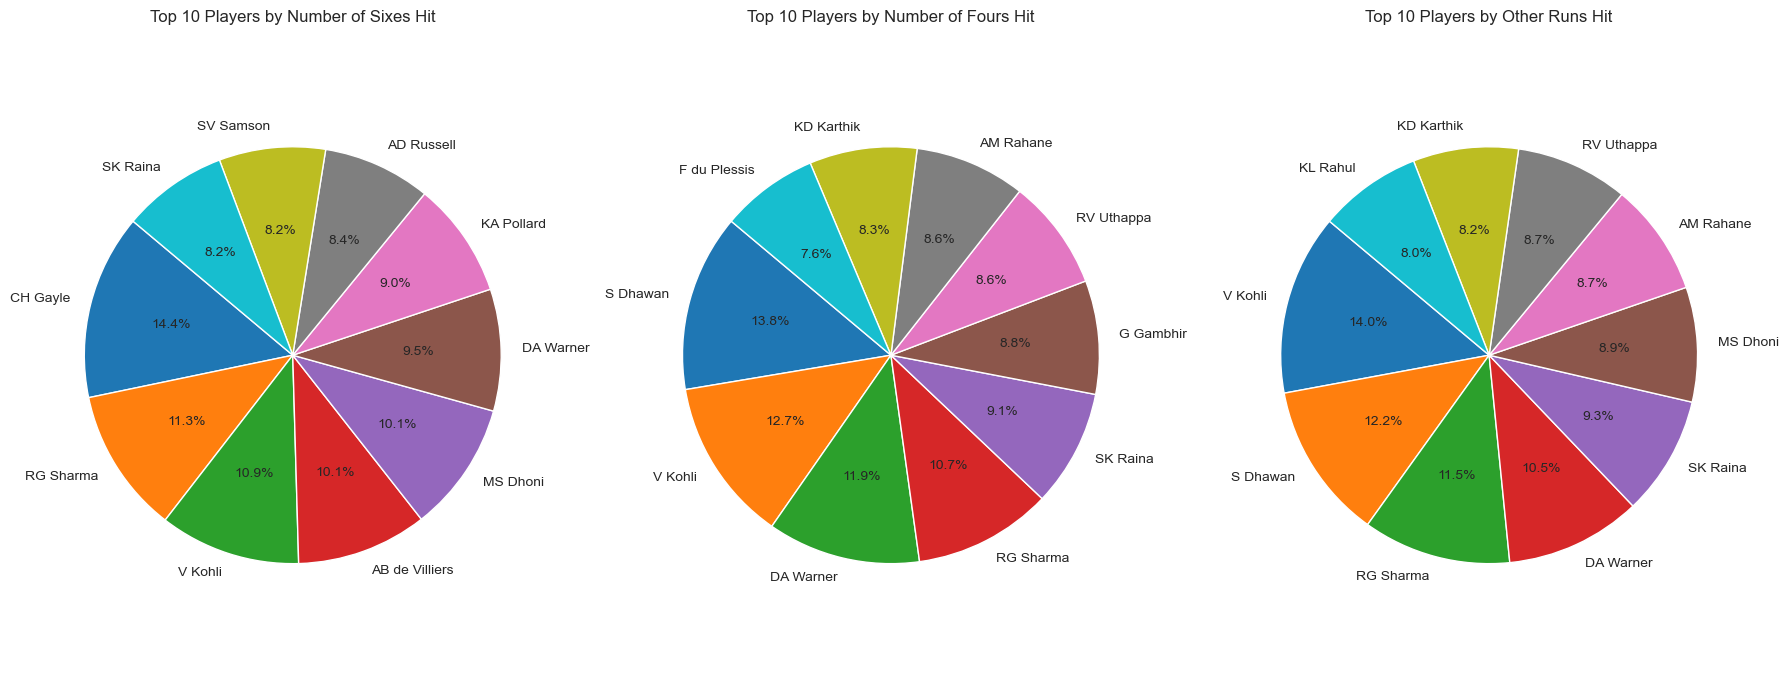

In [287]:
sixes_count = bat_df[bat_df['batsman_runs'] == 6].groupby('batter').size().reset_index(name='sixes')  
top_10_sixes = sixes_count.nlargest(10, 'sixes')  
fours_count = bat_df[bat_df['batsman_runs'] == 4].groupby('batter').size().reset_index(name='fours')  
top_10_fours = fours_count.nlargest(10, 'fours')  
other_runs_count = bat_df[~bat_df['batsman_runs'].isin([4, 6])].groupby('batter').size().reset_index(name='other_runs')  
top_10_other_runs = other_runs_count.nlargest(10, 'other_runs')

fig, axes = plt.subplots(1, 3, figsize=(18, 7))

axes[0].pie(top_10_sixes['sixes'], labels=top_10_sixes['batter'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Top 10 Players by Number of Sixes Hit')
axes[0].axis('equal')

axes[1].pie(top_10_fours['fours'], labels=top_10_fours['batter'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Top 10 Players by Number of Fours Hit')
axes[1].axis('equal')

axes[2].pie(top_10_other_runs['other_runs'], labels=top_10_other_runs['batter'], autopct='%1.1f%%', startangle=140)
axes[2].set_title('Top 10 Players by Other Runs Hit')
axes[2].axis('equal')

plt.tight_layout()
plt.show()

In [301]:
wickets_df = bat_df[bat_df['is_wicket'] == 1]

bowler_stats = bat_df.groupby('bowler').agg(
    balls_bowled=('ball', 'count'),
    wickets_taken=('is_wicket', 'sum')
).reset_index()

bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['wickets_taken']

bowler_stats['strike_rate'] = bowler_stats['strike_rate'].fillna(float('inf'))

bowler_stats_sorted = bowler_stats.sort_values(by='strike_rate', ascending=True)

bowler_df = bowler_stats_sorted[['bowler', 'balls_bowled', 'wickets_taken', 'strike_rate']]
bowler_df = bowler_df.sort_values('wickets_taken', ascending = False)
bowler_df = style_dataframe(bowler_df.head(10))
bowler_df

,bowler,balls_bowled,wickets_taken,strike_rate
524,YS Chahal,3628,213,17.032864
119,DJ Bravo,3296,207,15.922705
348,PP Chawla,3895,201,19.378109
446,SP Narine,4146,200,20.730000
355,R Ashwin,4679,198,23.631313
71,B Kumar,4060,195,20.820513
438,SL Malinga,2974,188,15.819149
8,A Mishra,3444,183,18.819672
193,JJ Bumrah,3185,182,17.500000
373,RA Jadeja,3895,169,23.047337



### Best Orange Cap Contenders in IPL
#### Batting (Main Criteria for Orange Cap)
- The Orange Cap is awarded to the highest run-scorer in an IPL season.
  - Ideal candidates are batsmen who excel in:
    - **Powerplay (explosive starts)**
    - **Middle overs (building the innings)**
    - **Death overs (finishing strong with big hits)**
- **Top Contenders Based on Past Performance & Form:**
  - **Virat Kohli (RCB)** – IPL's highest-ever run-scorer, consistent performer.
  - **Rohit Sharma (MI)** – Explosive opener, thrives under pressure.
  - **Shubman Gill (GT)** – Elegant stroke play, IPL 2023's top scorer.
  - **Jos Buttler (RR)** – Aggressive batter, can dominate powerplay and death overs.
  - **David Warner (DC)** – Proven IPL performer, excels in long tournaments.

#### Bowling Influence on Orange Cap?
- While bowling isn't a direct factor, top batsmen must counter the best bowlers to win the Orange Cap.
- **Bowlers who challenge top run-scorers:**
  - Jasprit Bumrah (MI) – Deadly in the death overs.
  - Rashid Khan (GT) – Tough to score against in middle overs.
  - Mohammed Shami (GT) – Effective with the new ball.

#### Final Prediction
- Based on past IPL performances, the **top contenders for the Orange Cap** are:
  🏆 **Virat Kohli & Shubman Gill** – Their consistency and ability to anchor innings make them the strongest candidates for IPL 2025's leading run-scorer.
